<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/CodingwithQiskitRuntime_Episode03_GettingStartedwithRuntime_mkbahk_20241217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install Qiskit

In [1]:
%pip install qiskit[visualization]==1.3.1
%pip install qiskit-ibm-runtime==0.34.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 10.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=f8a60fd2cba957f92cfa4bd7e7659c0a4e0cebe724f5dd80c50c79e1cdb11eb8
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
%pip show qiskit qiskit-ibm-runtime

Name: qiskit
Version: 1.3.1
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-ibm-runtime
---
Name: qiskit-ibm-runtime
Version: 0.34.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: 
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ibm-platform-services, numpy, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3, websocket-client
Required-by: 


##Step 1. Set up an Quantum Runtime Service channel

In [145]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="",
                               instance="ibm-q/open/main")
service

<QiskitRuntimeService>

In [ ]:
#from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
#QiskitRuntimeService.save_account(
#    channel="ibm_cloud",
#    token="y",
#    instance="",
#    # Explicitly set instance to None for ibm_cloud channel
#    set_as_default=True,
#    # Use `overwrite=True` if you're updating your token.
#    overwrite=True,
#)

# Load saved credentials
#service = QiskitRuntimeService()

In [5]:
#backends= service.backends()
backends= service.backends(simulator=False, min_num_qubits=5)
backends

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

In [6]:
#backend = service.backends()[0]
#backend = service.least_busy(operational=True, simulator=False)
backend = service.backend("ibm_brisbane")
#backend = service.backend("ibmq_qasm_simulator")
#backend = service.backend("simulator_statevector")
#backend = service.backend("simulator_mps")
#backend = service.backend("simulator_stabilizer")

In [7]:
print(backend)

<IBMBackend('ibm_brisbane')>


In [8]:
from qiskit import QuantumCircuit, transpile
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

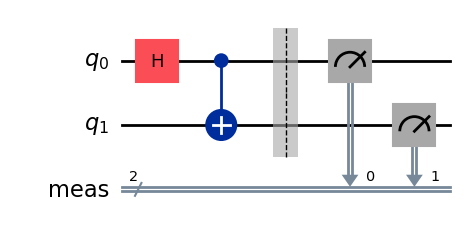

In [9]:
qc.draw('mpl')

In [117]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm1 = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm1.run(qc)
pm2 = generate_preset_pass_manager(backend=backend, optimization_level=2)
other_isa_curcuit = pm2.run(qc)

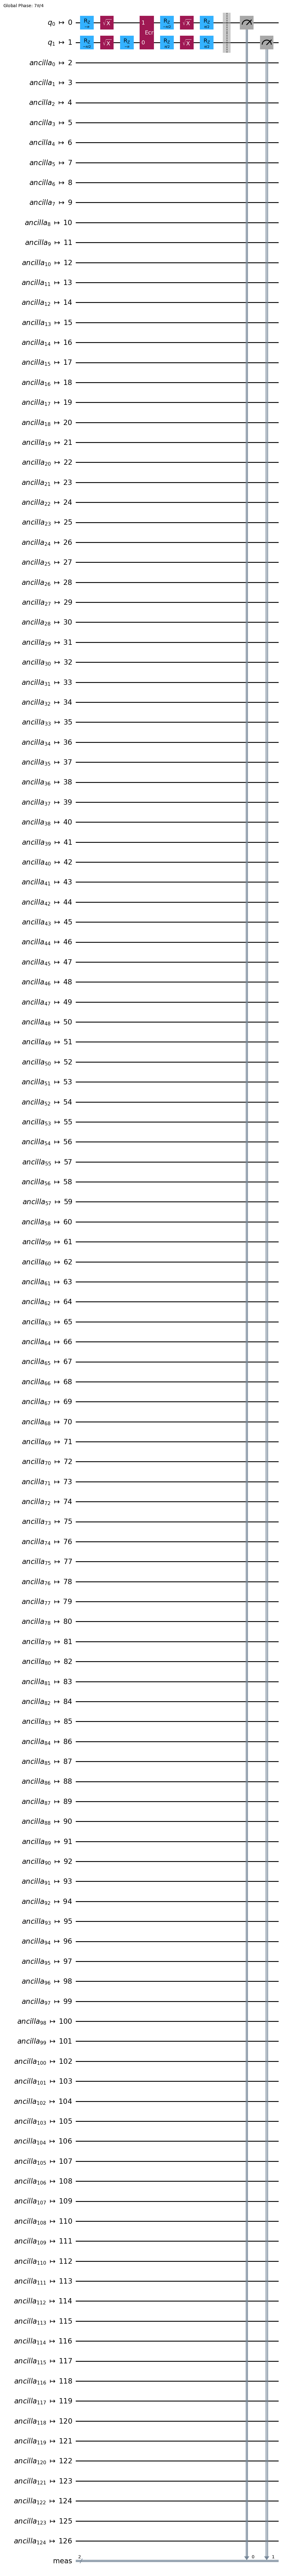

In [118]:
isa_circuit.draw('mpl')

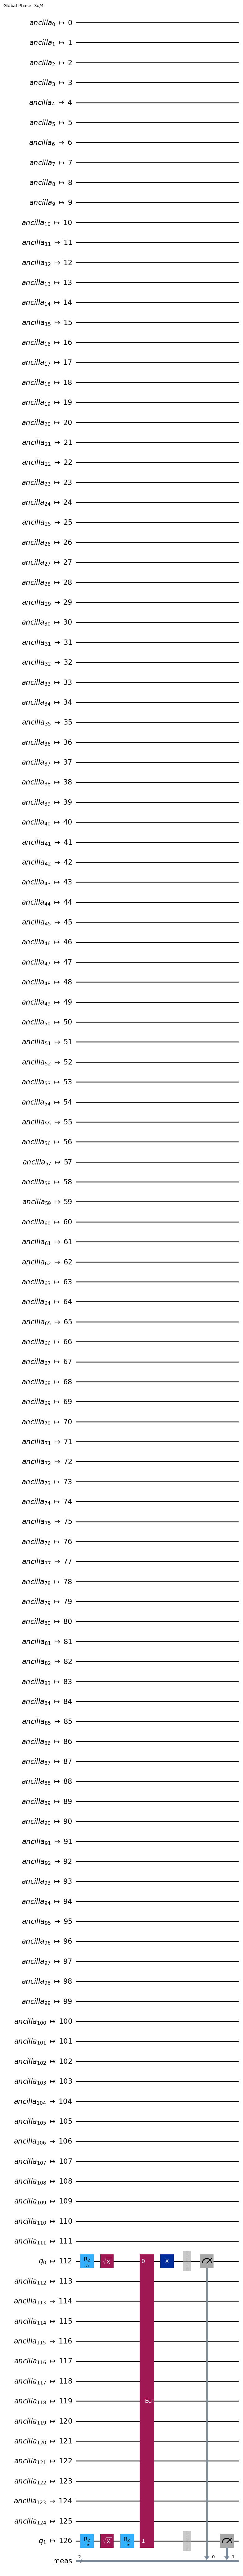

In [119]:
other_isa_curcuit.draw("mpl")

# Single Job Mode

In [76]:
#sampler = Sampler(backend)
#job = sampler.run([isa_circuit])

# Use the job ID to retrieve your job data later
#job_id=job.job_id()
#job_id

'cxgfwrkgcckg008segz0'

#Session Mode

In [121]:
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

with Session(backend=backend) as session:
    sampler = Sampler(mode=session)
    job = sampler.run([isa_circuit], shots=1024)
    other_job = sampler.run([other_isa_curcuit], shots=1024)
###with
job_id = job.job_id()
other_job_id = other_job.job_id()

In [123]:
print("Job_ID:" + job_id + "\nJob Status:" + job.status())

Job_ID:cxggd64ky7rg0083yymg
Job Status:RUNNING


In [124]:
print("Other_Job_ID:" + other_job_id + "\nJob Status:" + other_job.status())

Other_Job_ID:cxggd6w3ej4g008g5pr0
Job Status:DONE


In [125]:
result = job.result()
result

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-12-17 05:05:31', stop='2024-12-17 05:05:47', size=1024>)])}, 'version': 2})

In [126]:
other_result = other_job.result()
other_result

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-12-17 05:05:33', stop='2024-12-17 05:06:05', size=1024>)])}, 'version': 2})

In [130]:
# first job
print(f" > Counts for job 1: {result[0].data.meas.get_counts()}")

 > Counts for job 1: {'11': 484, '00': 451, '01': 49, '10': 40}


In [131]:
# first job
print(f" > Counts for job 1: {other_result[0].data.meas.get_counts()}")

 > Counts for job 1: {'11': 541, '00': 464, '10': 7, '01': 12}


In [132]:
counts = result[0].data.meas.get_counts()
other_counts = other_result[0].data.meas.get_counts()

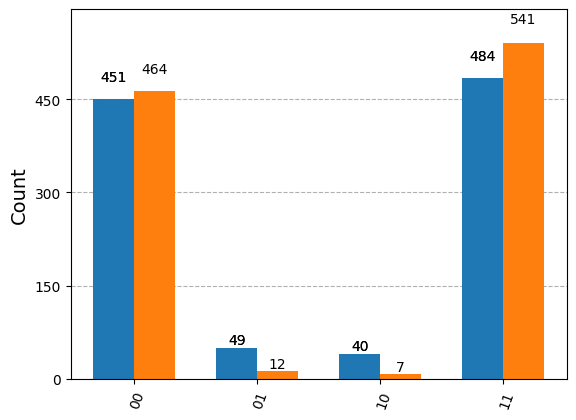

In [146]:
from qiskit.visualization import plot_histogram
plot_histogram([counts, other_counts])

In [147]:
session.status

<bound method Session.status of <qiskit_ibm_runtime.session.Session object at 0x7969187a2d70>>

In [148]:
session.close()

#기 수행된 Job 결과 가져오기

provider로 수행된 circuit-runner job

In [101]:
retrieved_job = service.job("cxcjcsbrkac0008hx2wg")
result = retrieved_job.result()
result

Result(backend_name='ibm_brisbane', backend_version='0.0.0', qobj_id='Unknown', job_id='Unknown', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 422, '0x3': 500, '0x2': 49, '0x1': 53}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13], ['q', 14], ['q', 15], ['q', 16], ['q', 17], ['q', 18], ['q', 19], ['q', 20], ['q', 21], ['q', 22], ['q', 23], ['q', 24], ['q', 25], ['q', 26], ['q', 27], ['q', 28], ['q', 29], ['q', 30], ['q', 31], ['q', 32], ['q', 33], ['q', 34], ['q', 35], ['q', 36], ['q', 37], ['q', 38], ['q', 39], ['q', 40], ['q', 41], ['q', 42], ['q', 43], ['q', 44], ['q', 45], ['q', 46], ['q', 47], ['q', 48], ['q', 49], ['q', 50], ['q', 51], ['q', 52], ['q', 53], ['q', 54], ['q', 55], ['q', 56], ['q', 57], ['q', 58], ['q', 59], ['q', 60], ['q', 61], ['q', 62], ['q', 63], ['q'

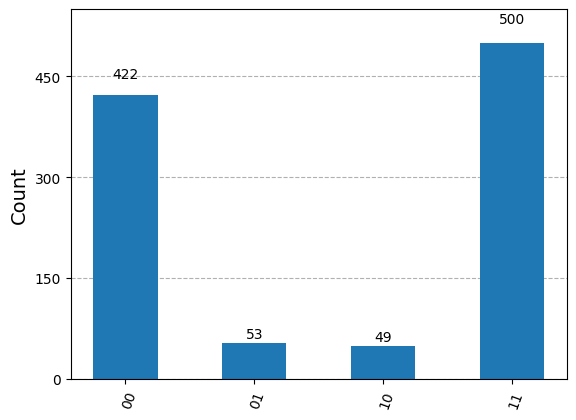

In [102]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts())

qiskit runtime 방식으로 수행된 sampler-job

In [103]:
retrieved_job = service.job("cxgftwbvw7kg008s5ztg")
result = retrieved_job.result()
result

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-12-17 04:26:27', stop='2024-12-17 04:26:40', size=4096>)])}, 'version': 2})

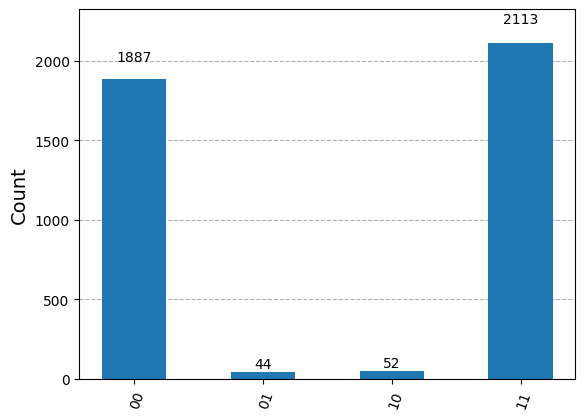

In [100]:
from qiskit.visualization import plot_histogram
plot_histogram(result[0].data.meas.get_counts())